In [1]:
# First, mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Now import other libraries
import torch
import os

# Define the path to your model file in Google Drive
# Based on your folder name
model_path = '/content/drive/MyDrive/Smoke-Fire-Detection-YOLO-V12-main/Smoke Fire.pt'

# Check if file exists
if not os.path.exists(model_path):
    print(f"File not found at: {model_path}")
    print("Current working directory:", os.getcwd())
    print("\nSearching in Google Drive...")

    # Try to find the file
    possible_locations = [
        model_path,
        '/content/drive/MyDrive/Smoke-Fire-Detection-YOLO-V12-main/Smoke Fire.pt',
        '/content/drive/MyDrive/Smoke Fire.pt',
        '/content/drive/MyDrive/Smoke_Fire.pt',
        '/content/drive/MyDrive/smoke_fire.pt',
        # Search recursively
    ]

    found = False
    for loc in possible_locations:
        if os.path.exists(loc):
            model_path = loc
            print(f"Found file at: {model_path}")
            found = True
            break

    if not found:
        # List contents of the directory
        base_dir = '/content/drive/MyDrive/Smoke-Fire-Detection-YOLO-V12-main'
        if os.path.exists(base_dir):
            print(f"\nContents of {base_dir}:")
            print(os.listdir(base_dir))

            # Search for .pt files in the directory
            for root, dirs, files in os.walk(base_dir):
                for file in files:
                    if file.endswith('.pt'):
                        print(f"Found .pt file: {os.path.join(root, file)}")
else:
    print(f"File found at: {model_path}")

# Load the model
try:
    # Load the model
    model = torch.load(model_path, map_location=torch.device('cpu'))

    print("\n" + "="*50)
    print("Model loaded successfully!")
    print(f"Model type: {type(model)}")

    # If it's a dictionary (common for saved PyTorch models)
    if isinstance(model, dict):
        print("\nModel keys:", list(model.keys()))
        print("\nModel dictionary contents:")
        for key, value in model.items():
            if hasattr(value, 'shape'):
                print(f"  {key}: {value.shape} (tensor)")
            elif hasattr(value, '__len__'):
                print(f"  {key}: {type(value)}, length: {len(value)}")
            else:
                print(f"  {key}: {type(value)}")

    # If it's a PyTorch model
    elif hasattr(model, 'state_dict'):
        print("\nPyTorch Model Architecture:")
        print(model)

        print(f"\nModel has state_dict with {len(model.state_dict())} items")

        # Show first few parameters
        print("\nFirst 10 parameters in state_dict:")
        for i, (name, param) in enumerate(model.state_dict().items()):
            if i < 10:
                print(f"  {name}: {param.shape}")
            else:
                break

        # Count total parameters
        if hasattr(model, 'parameters'):
            num_params = sum(p.numel() for p in model.parameters())
            print(f"\nTotal trainable parameters: {num_params:,}")

    # If it's a YOLO model saved in a specific format
    elif hasattr(model, 'model'):
        print("\nYOLO model detected")
        print(f"Model class: {model.__class__.__name__}")

        # Try to access the underlying model
        print(f"Has 'model' attribute: {hasattr(model, 'model')}")
        print(f"Has 'names' attribute: {hasattr(model, 'names')}")

        if hasattr(model, 'names'):
            print(f"Class names: {model.names}")

    print("\n" + "="*50)

except FileNotFoundError:
    print(f"\nFile not found at: {model_path}")
    print("\nPlease check:")
    print("1. The exact path in Google Drive")
    print("2. The filename spelling")
    print("3. File permissions")

    # Navigate to check directory
    print("\nNavigating to Google Drive...")
    !ls -la "/content/drive/MyDrive/"

except Exception as e:
    print(f"\nError loading model: {type(e).__name__}: {e}")

    # Additional debugging info
    print("\nDebug info:")
    print(f"File path: {model_path}")
    print(f"File exists: {os.path.exists(model_path)}")
    if os.path.exists(model_path):
        file_size = os.path.getsize(model_path)
        print(f"File size: {file_size} bytes ({file_size/1024/1024:.2f} MB)")

Mounted at /content/drive
File not found at: /content/drive/MyDrive/Smoke-Fire-Detection-YOLO-V12-main/Smoke Fire.pt
Current working directory: /content

Searching in Google Drive...

Contents of /content/drive/MyDrive/Smoke-Fire-Detection-YOLO-V12-main:
['Smoke-Fire-Detection-YOLO-V12-main']
Found .pt file: /content/drive/MyDrive/Smoke-Fire-Detection-YOLO-V12-main/Smoke-Fire-Detection-YOLO-V12-main/Smoke Fire.pt

File not found at: /content/drive/MyDrive/Smoke-Fire-Detection-YOLO-V12-main/Smoke Fire.pt

Please check:
1. The exact path in Google Drive
2. The filename spelling
3. File permissions

Navigating to Google Drive...
total 12900750
-rw------- 1 root root    1150976 Mar 20  2023 '02_Student_Placement_Report_Monday 03 2023_MSE.xls'
-rw------- 1 root root     832652 Oct  2  2022 '1663395747899_1. Functions + Transformations.pptx'
-rw------- 1 root root      14021 Oct  2  2022  1664026301302_PROG.docx
-rw------- 1 root root     832652 Oct  2  2022 '1. Functions + Transformations (

In [3]:
# Install ultralytics if needed
!pip install ultralytics -q

from ultralytics import YOLO

model_path = '/content/drive/MyDrive/Smoke-Fire-Detection-YOLO-V12-main/Smoke-Fire-Detection-YOLO-V12-main/Smoke Fire.pt'

# Load the model with Ultralytics
model = YOLO(model_path)

print("✅ Model loaded successfully with Ultralytics YOLO!")
print(f"📊 Model type: {type(model)}")
print(f"🎯 Class names: {model.names}")
print(f"🔢 Number of classes: {len(model.names)}")

# Show model info
print("\n📋 Model information:")
model.info()

# Show model architecture
print("\n🧠 Model architecture summary:")
print(model.model)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Model loaded successfully with Ultralytics YOLO!
📊 Model type: <class 'ultralytics.models.yolo.model.YOLO'>
🎯 Class names: {0: 'smoke', 1: 'fire'}
🔢 Number of classes: 2

📋 Model information:
YOLOv12n summary: 272 layers, 2,568,438 parameters, 0 gradients, 6.5 GFLOPs

🧠 Model architecture summary:
DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d

✅ Model ready! Classes: {0: 'smoke', 1: 'fire'}

📤 Upload your video file (mp4, avi, mov, etc.):


Saving AI Drone Fire Suppression.mp4 to AI Drone Fire Suppression.mp4

📹 Uploaded: AI Drone Fire Suppression.mp4

📊 Video info:
   Size: 1280x720
   FPS: 25
   Total frames: 413

🎬 Processing video... (This may take a while)

🎥 Frame 1 preview:


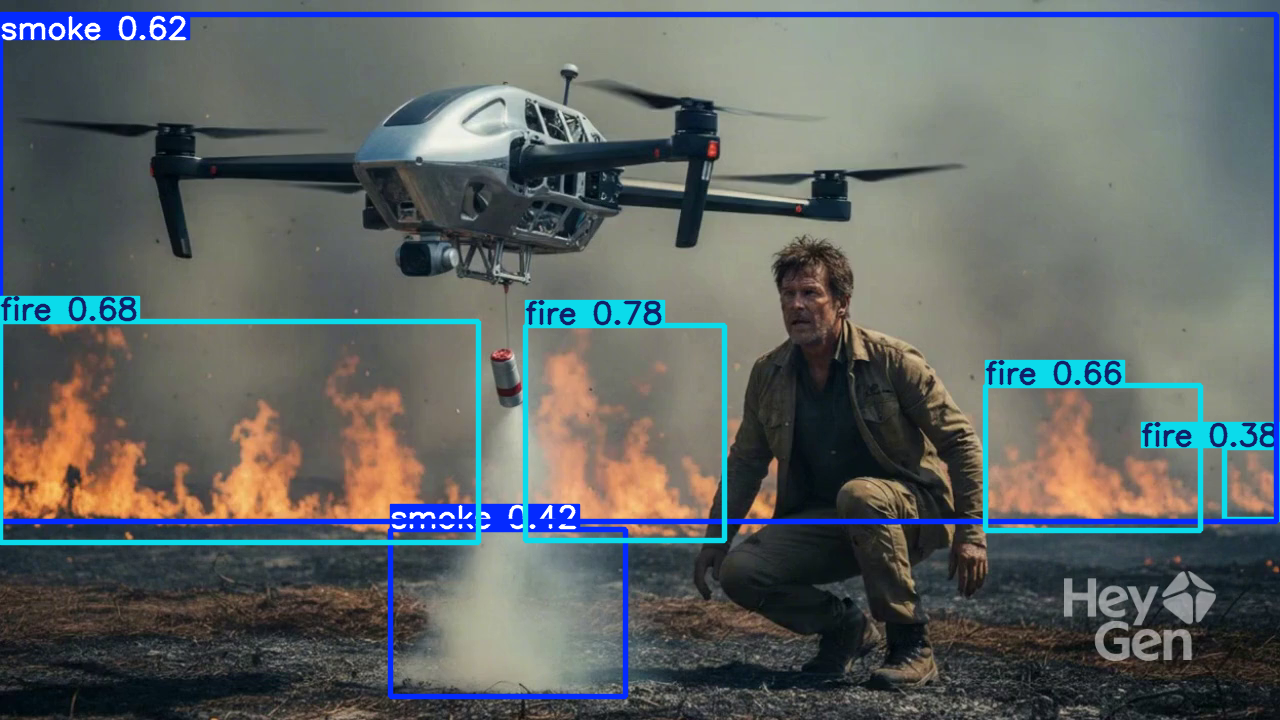


🎥 Frame 2 preview:


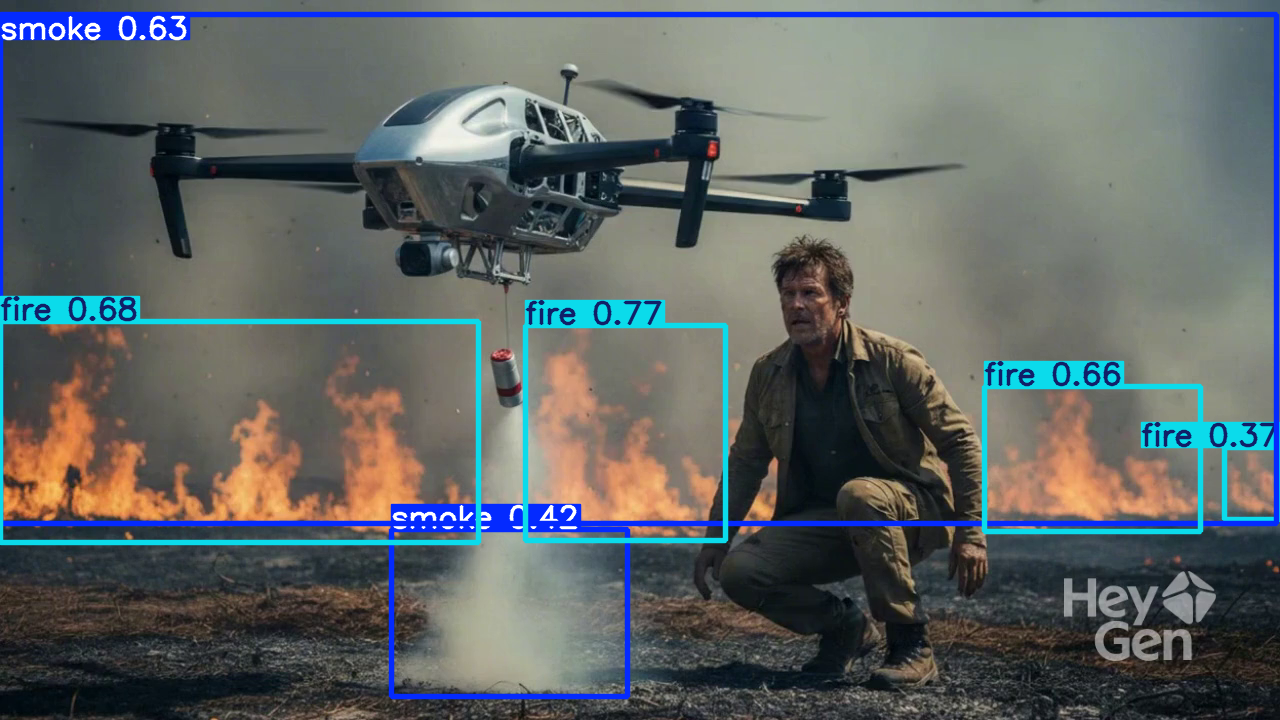


🎥 Frame 3 preview:


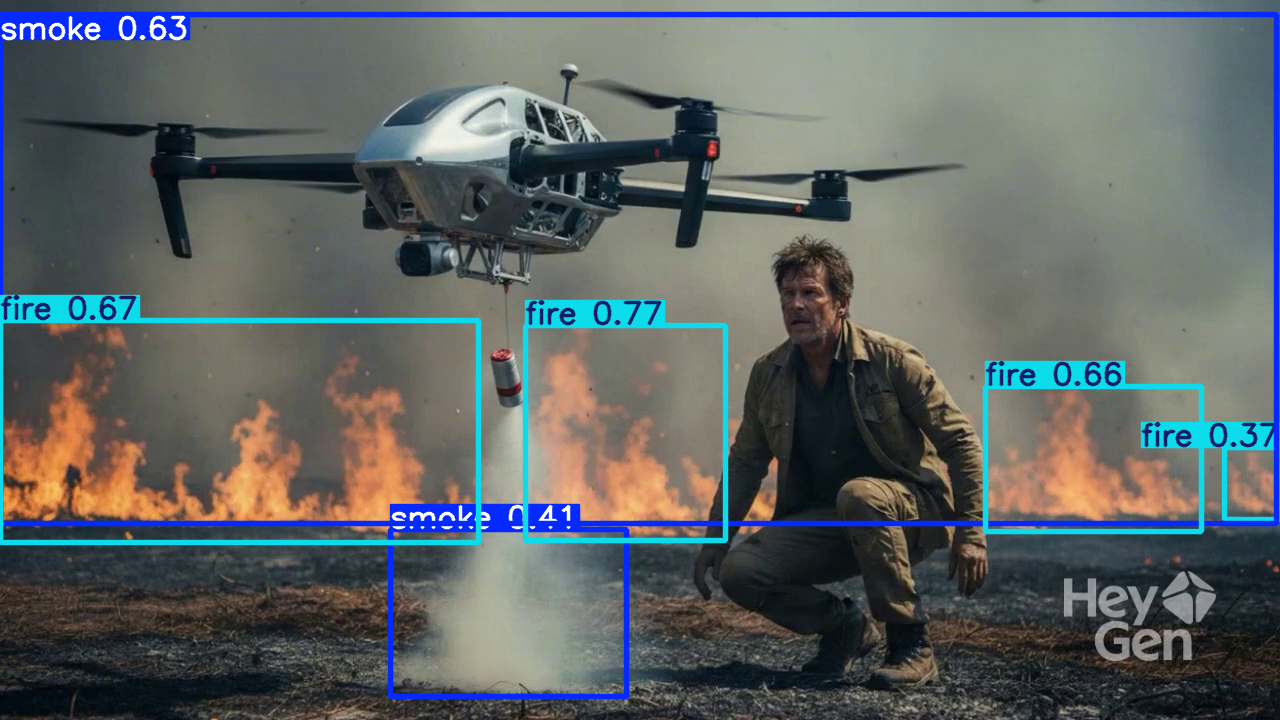


🎥 Frame 4 preview:


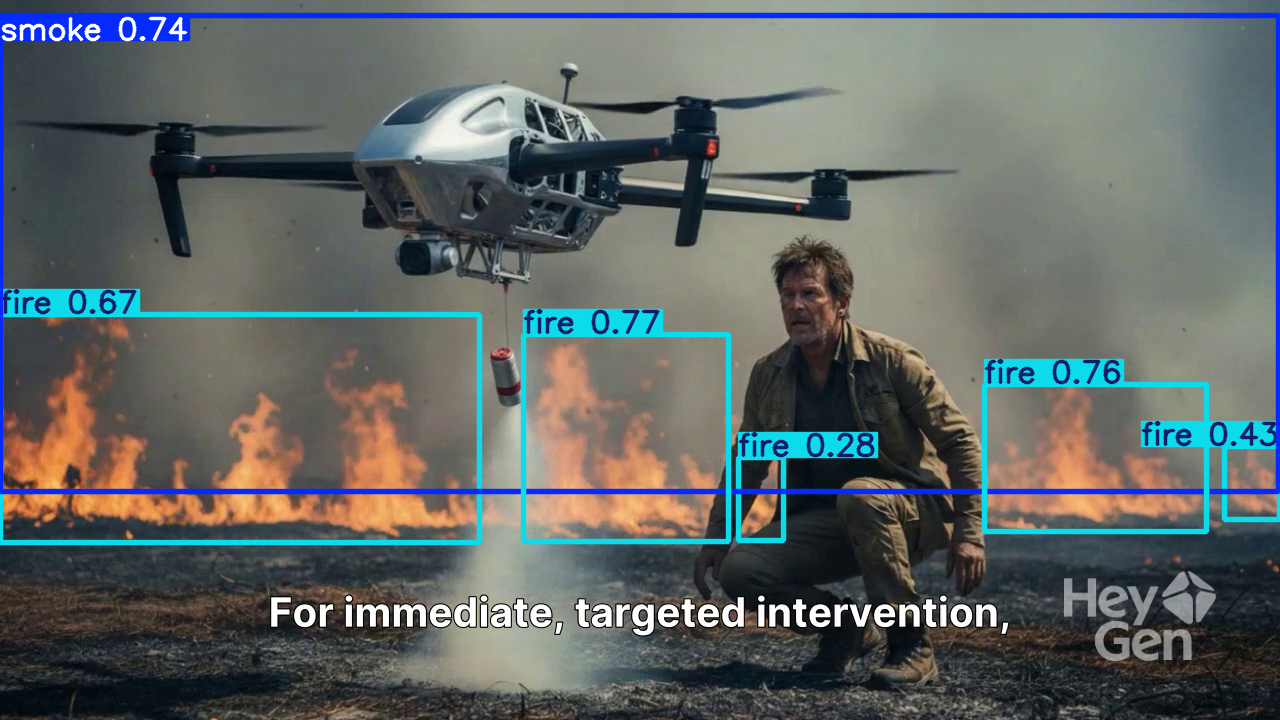


🎥 Frame 5 preview:


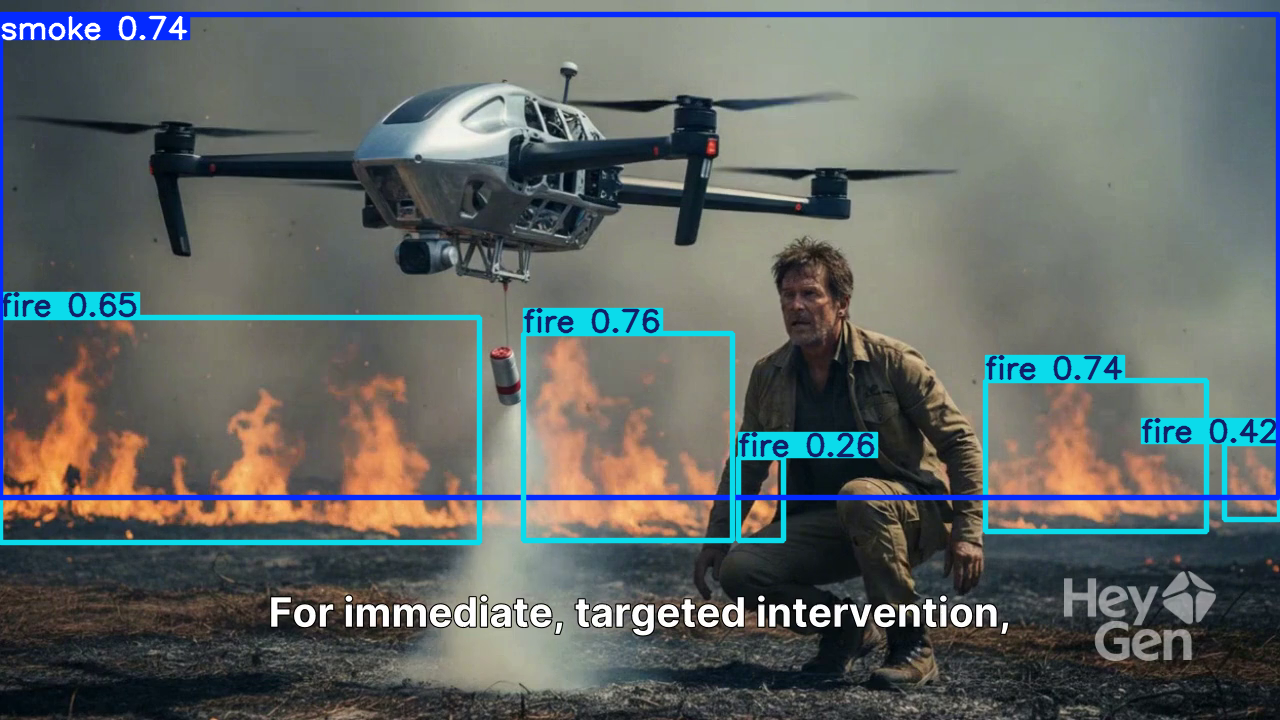

   Processed 50/413 frames...
   Processed 100/413 frames...
   Processed 150/413 frames...
   Processed 200/413 frames...
   Processed 250/413 frames...
   Processed 300/413 frames...
   Processed 350/413 frames...
   Processed 400/413 frames...

✅ Processing complete!
📊 Summary:
   Total frames: 413
   Total fire detections: 1889
   Total smoke detections: 449

📥 Download link for processed video:



🔄 Creating preview GIF...
📸 Preview GIF created:


In [13]:
# First, install required packages
!pip install ultralytics opencv-python pillow -q

# Import libraries
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import os
from IPython.display import display, HTML

# Load your already downloaded model
model_path = '/content/drive/MyDrive/Smoke-Fire-Detection-YOLO-V12-main/Smoke-Fire-Detection-YOLO-V12-main/Smoke Fire.pt'
model = YOLO(model_path)

print("✅ Model ready! Classes:", model.names)

# --- UPLOAD YOUR VIDEO ---
print("\n📤 Upload your video file (mp4, avi, mov, etc.):")
uploaded = files.upload()

# Get the uploaded file
uploaded_filename = list(uploaded.keys())[0]
print(f"\n📹 Uploaded: {uploaded_filename}")

# Read the video
video_path = f"/content/{uploaded_filename}"
cap = cv2.VideoCapture(video_path)

# Get video info
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"\n📊 Video info:")
print(f"   Size: {width}x{height}")
print(f"   FPS: {fps}")
print(f"   Total frames: {total_frames}")

# Process video
print("\n🎬 Processing video... (This may take a while)")

# Create output video
output_path = f"/content/detected_{uploaded_filename}"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_count = 0
fire_count = 0
smoke_count = 0

# Process each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Show progress every 50 frames
    if frame_count % 50 == 0:
        print(f"   Processed {frame_count}/{total_frames} frames...")

    # Run detection
    results = model(frame, conf=0.25, verbose=False)

    # Draw detections
    if results[0].boxes:
        result_frame = results[0].plot()

        # Count detections
        for box in results[0].boxes:
            cls = int(box.cls[0])
            if model.names[cls] == 'fire':
                fire_count += 1
            elif model.names[cls] == 'smoke':
                smoke_count += 1
    else:
        result_frame = frame

    # Write to output
    out.write(result_frame)

    # Show first few frames for preview
    if frame_count <= 5:
        print(f"\n🎥 Frame {frame_count} preview:")
        cv2_imshow(result_frame)

# Release everything
cap.release()
out.release()

print("\n✅ Processing complete!")
print(f"📊 Summary:")
print(f"   Total frames: {frame_count}")
print(f"   Total fire detections: {fire_count}")
print(f"   Total smoke detections: {smoke_count}")

# Show sample result frame
print(f"\n📥 Download link for processed video:")
display(HTML(f'<a href="{output_path}" download="detected_video.mp4">⬇️ Click here to download detected video</a>'))

# Optional: Create a preview GIF of first few seconds
print(f"\n🔄 Creating preview GIF...")

# Re-read first 5 seconds for GIF
cap = cv2.VideoCapture(video_path)
gif_frames = []
max_frames_for_gif = min(30, frame_count)  # Max 30 frames for GIF

for i in range(max_frames_for_gif):
    ret, frame = cap.read()
    if not ret:
        break

    # Run detection on this frame
    results = model(frame, conf=0.25, verbose=False)

    if results[0].boxes:
        result_frame = results[0].plot()
    else:
        result_frame = frame

    # Resize for GIF
    result_frame = cv2.resize(result_frame, (640, 480))
    gif_frames.append(result_frame)

cap.release()

# Save as GIF
if gif_frames:
    from PIL import Image
    gif_path = "/content/preview.gif"

    # Convert frames to PIL Images
    pil_frames = []
    for frame in gif_frames:
        pil_frame = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        pil_frames.append(pil_frame)

    # Save as GIF
    pil_frames[0].save(gif_path, save_all=True, append_images=pil_frames[1:],
                      duration=100, loop=0)

    print(f"📸 Preview GIF created:")
    display(HTML(f'<img src="{gif_path}" alt="Preview GIF" width="640">'))
    display(HTML(f'<a href="{gif_path}" download="preview.gif">⬇️ Download GIF preview</a>'))

🔥 SMOKE & FIRE DETECTION
📸 Take pictures with your laptop camera and upload them!
💡 Use Windows Camera app or your phone to take pics

📤 Upload images (take pics with camera first):


Saving images (2).jpg to images (2).jpg
Saving images (1).jpg to images (1).jpg
Saving images.jpg to images.jpg

📄 Processing: images (2).jpg

0: 544x640 1 fire, 207.3ms
Speed: 3.4ms preprocess, 207.3ms inference, 0.8ms postprocess per image at shape (1, 3, 544, 640)
  🔥 fire: 0.89
  📊 Total: 1 fire, 0 smoke


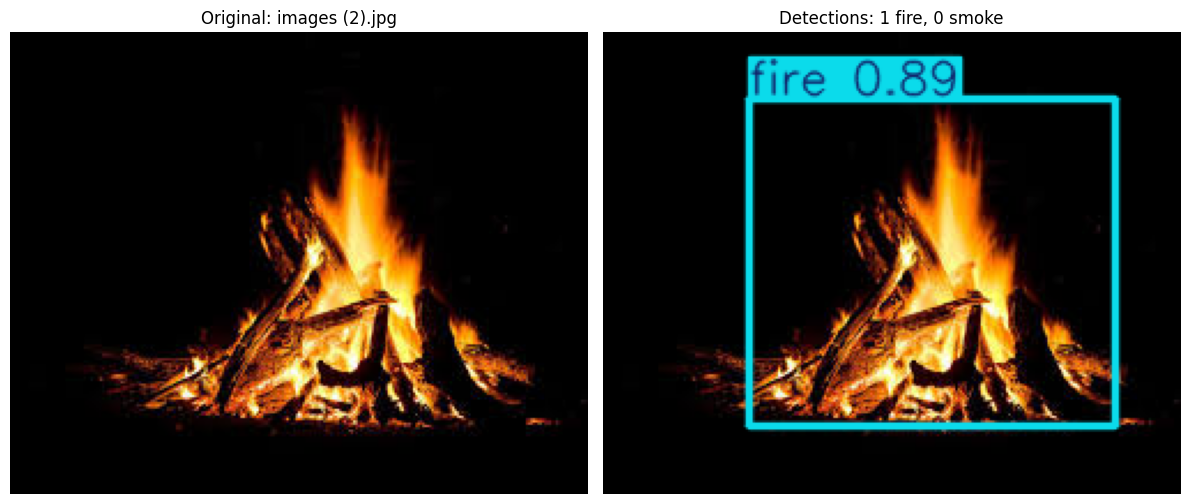


📄 Processing: images (1).jpg

0: 384x640 1 smoke, 3 fires, 131.0ms
Speed: 3.1ms preprocess, 131.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
  🔥 fire: 0.70
  🔥 fire: 0.59
  🔥 smoke: 0.55
  🔥 fire: 0.32
  📊 Total: 3 fire, 1 smoke


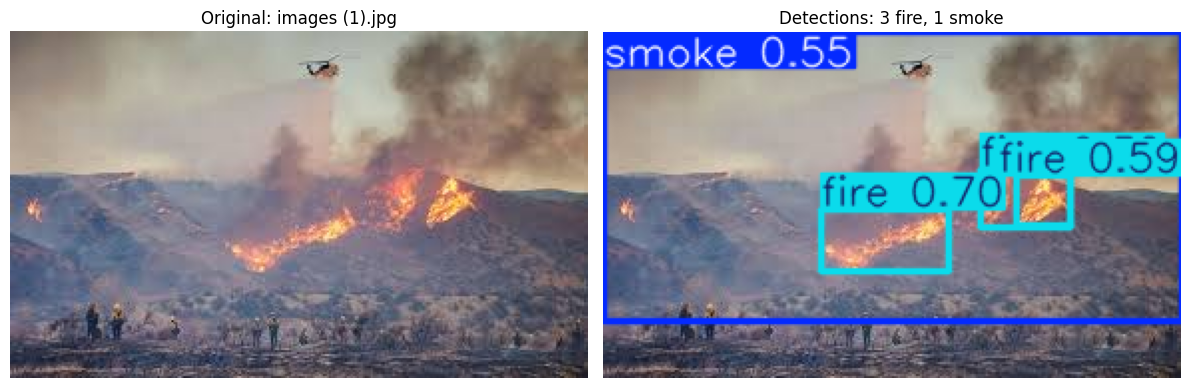


📄 Processing: images.jpg

0: 480x640 2 fires, 178.3ms
Speed: 3.4ms preprocess, 178.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
  🔥 fire: 0.43
  🔥 fire: 0.32
  📊 Total: 2 fire, 0 smoke


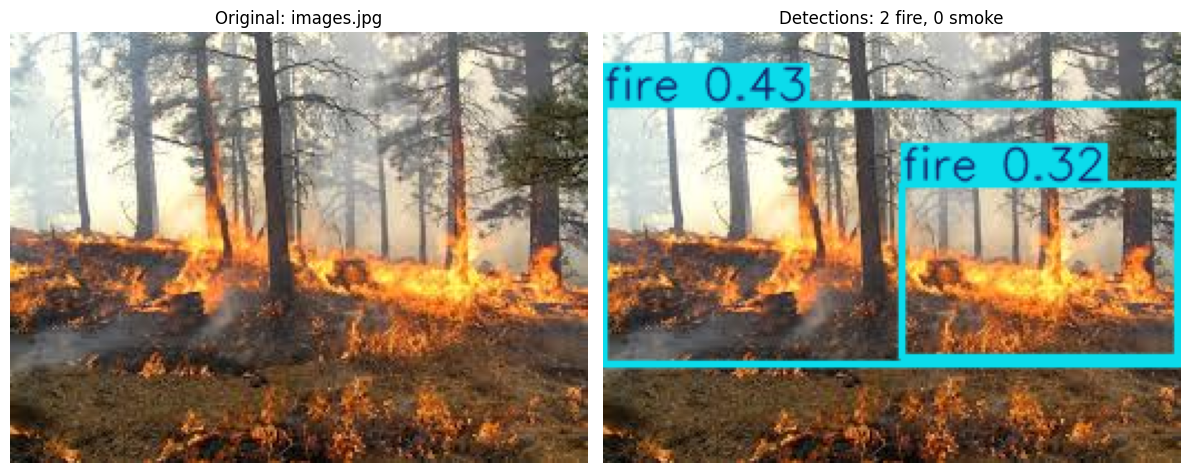


✅ All images processed!

💡 To test with real-time camera:
1. Install Python on laptop (check 'Add to PATH')
2. Install: pip install flask opencv-python
3. Run the server script


In [6]:
# 🔥TEST WITH UPLOADED IMAGES 🔥
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Load your model
model_path = '/content/drive/MyDrive/Smoke-Fire-Detection-YOLO-V12-main/Smoke-Fire-Detection-YOLO-V12-main/Smoke Fire.pt'
model = YOLO(model_path)

print("🔥 SMOKE & FIRE DETECTION")
print("="*60)
print("📸 Take pictures with your laptop camera and upload them!")
print("💡 Use Windows Camera app or your phone to take pics")
print("="*60)

# Upload images
print("\n📤 Upload images (take pics with camera first):")
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"\n📄 Processing: {filename}")

    # Read image
    image_data = uploaded[filename]
    nparr = np.frombuffer(image_data, np.uint8)
    frame = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    if frame is None:
        print(f"❌ Could not read image")
        continue

    # Run detection
    results = model(frame, conf=0.25)

    # Show results
    if results[0].boxes:
        result_frame = results[0].plot()

        # Count detections
        fire_count = 0
        smoke_count = 0
        for box in results[0].boxes:
            cls = int(box.cls[0])
            conf = float(box.conf[0])
            label = model.names[cls]

            if label == 'fire':
                fire_count += 1
            elif label == 'smoke':
                smoke_count += 1

            print(f"  🔥 {label}: {conf:.2f}")

        print(f"  📊 Total: {fire_count} fire, {smoke_count} smoke")
    else:
        result_frame = frame
        print("  ❌ No smoke/fire detected")

    # Display
    plt.figure(figsize=(12, 6))

    # Original
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(f"Original: {filename}")
    plt.axis('off')

    # Detected
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
    plt.title(f"Detections: {fire_count} fire, {smoke_count} smoke")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

print("\n✅ All images processed!")
print("\n💡 To test with real-time camera:")
print("1. Install Python on laptop (check 'Add to PATH')")
print("2. Install: pip install flask opencv-python")
print("3. Run the server script")